# 2024 인공지능 실습 3차시: Machine Learning

2024년 6월 13일 목요일

목차:

1. XOR problem
  *   Perceptron
  *   MLP

2. Iris dataset
  * Classification
  * Cross Validation

3. 실습 과제


In [ ]:
#@title 실습에 사용되는 함수입니다. 실행 후 실습을 진행해주시기 바랍니다.

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Perceptron의 decision boundary를 그려주는 함수입니다.
# 함수 출처: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
def plot_decision_boundary(classifier, X, y, title):
  xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05
  ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05
  step = 0.01
  cm = plt.cm.coolwarm_r
  thr = 0.0
  xx, yy = np.meshgrid(np.arange(xmin - thr, xmax + thr, step), np.arange(ymin - thr, ymax + thr, step))
  if hasattr(classifier, 'predict'):
    Z = classifier.predict(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
  else:
    Z = classifier.predict_proba(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))[:, 1]

  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), alpha=0.6)
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.xticks((0.0, 1.0))
  plt.yticks((0.0, 1.0))
  plt.title(title)

# 2차원 데이터를 plot하는 임시 함수입니다.
def plot_data(x, y):
  plt.scatter([point[0] for point in x], [point[1] for point in x], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))
  plt.show()

# XOR problem

<img src=https://itwiki.kr/images/a/a3/XOR_%EB%AC%B8%EC%A0%9C.png width=700>

AND, OR, XOR 데이터를 생성해보겠습니다.

In [ ]:
import numpy as np

In [ ]:
# AND 데이터와 label을 생성합니다.
and_data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
and_labels = np.array([0, 0, 0, 1])

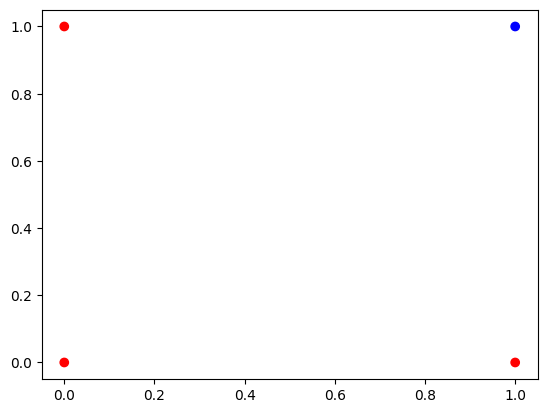

In [ ]:
# 제공된 함수를 사용하여 AND 데이터를 plot해봅시다.
plot_data(and_data, and_labels)

In [ ]:
# OR 데이터와 label을 생성합니다.
or_data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
or_labels = np.array([0, 1, 1, 1])

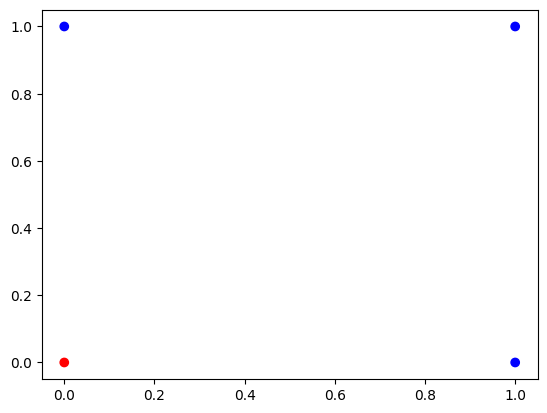

In [ ]:
# 제공된 함수를 사용하여 OR 데이터를 plot해봅시다.
plot_data(or_data, or_labels)

In [ ]:
# XOR 데이터와 label을 생성하고, 이를 plot합니다.

In [ ]:
# XOR 데이터와 label 생성합니다.
xor_data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
xor_labels = np.array([0, 1, 1, 0])

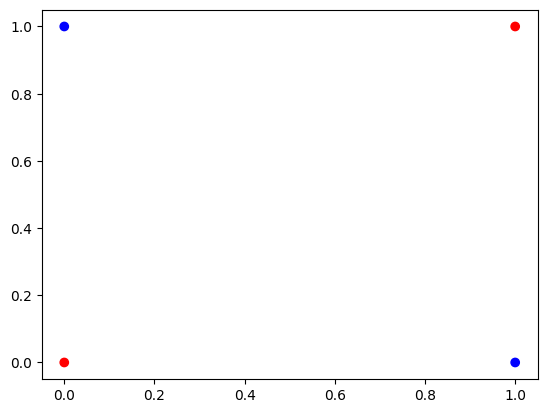

In [ ]:
# 제공된 함수를 사용하여 XOR 데이터를 plot해봅시다.
plot_data(xor_data, xor_labels)

# **Perceptron**

classification test 퍼셉트론은 신경망의 가장 기초가 되는 기본 단위입니다.

자세히 보면 "퍼셉트론(Perceptron)"이라는 단어는 두 단어의 조합임을 알 수 있습니다.

  * Perception: 무엇인가를 감지할 수 있는 능력
  * Neuron: 사람의 뇌에 주어지는 입력을 의미있는 정보로 변환하는 신경 세포

즉, 퍼셉트론은 간단한 결정을 내릴 수 있는 인공 뉴런이라고 할 수 있습니다.

퍼셉트론은 3가지 구성요소로 이루어져 있습니다.

  * 입력(Inputs): 각각의 입력 값은 feature에 대응합니다.

  * 가중치(Weights): 각 입력은, 중요도를 나타내는 가중치를 가지고 있습니다. 입력의 가중치가 크다는 것은, 결정을 내림에 있어서 해당 입력값이 중요한 역할을 하고 있다는 것을 의미합니다.

  * 출력(Output): 마지막으로, 퍼셉트론은 입력과 가중치를 사용하여 출력을 생성합니다. 출력 유형은 문제의 특성 및 데이터 도메인에 따라 다릅니다. 참과 거짓을 해결해야하는 문제(Classification)라면 0 또는 1로 출력값을 나타내야할 것이고, 만약 결과값이 연속된 수치(Regression)라면 정수로 결과값을 표현할 수 있어야할 것입니다.


  <img src=https://upload.wikimedia.org/wikipedia/commons/8/8c/Perceptron_moj.png width=500px>

  <img src=https://ujjwalkarn.me/wp-content/uploads/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png width=500px>

  

  본 실습에서는 scikit-learn에서 제공하는 [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) 모델을 사용합니다.



In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
# perceptron을 생성하고 AND 데이터에 대하여 훈련시킵니다.
perceptron_and = Perceptron()
perceptron_and.fit(and_data, and_labels)

Perceptron()

In [ ]:
# 학습된 perceptron의 score를 출력합니다.
perceptron_and.score(and_data, and_labels)

1.0

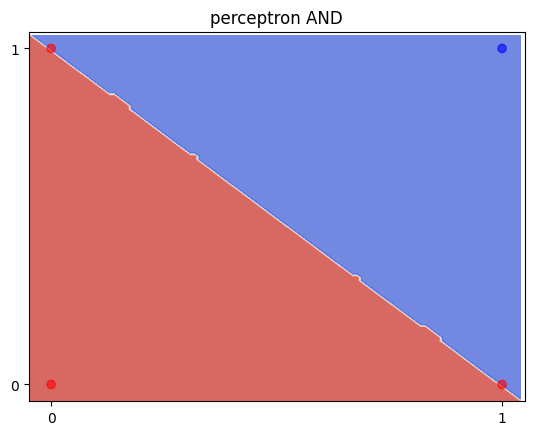

In [ ]:
# 주어진 함수를 이용하여 학습된 perceptron이 어떤 모습인지 시각화하여 봅시다.
plot_decision_boundary(perceptron_and, and_data, and_labels, "perceptron AND")

In [ ]:
# 학습된 model parameter을 출력해봅니다.
print(perceptron_and.coef_)
print(perceptron_and.intercept_)

[[2. 2.]]
[-2.]


In [ ]:
# 과제: AND 데이터에 대하여 perceptron의 decision boundary가 올바른가요?
# 답: Yes

In [ ]:
# 새로운 perceptron을 생성하고 OR 데이터에 대해 학습시킵니다.
perceptron_or = Perceptron()
perceptron_or.fit(or_data, or_labels)

Perceptron()

In [ ]:
# 학습된 perceptron의 score를 출력합니다.
perceptron_or.score(or_data, or_labels)

1.0

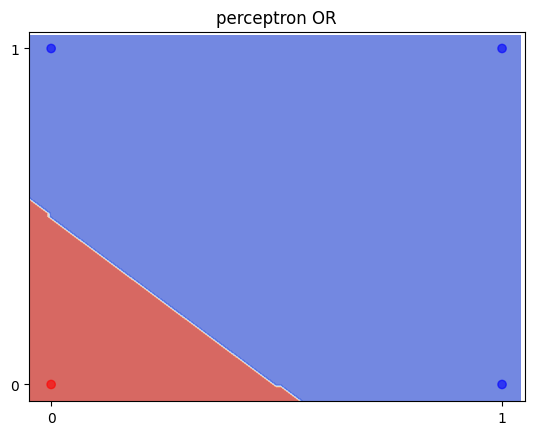

In [ ]:
# 주어진 함수를 이용하여 학습된 perceptron이 어떤 모습인지 시각화하여 봅시다.
plot_decision_boundary(perceptron_or, or_data, or_labels, "perceptron OR")

In [ ]:
# 과제: OR 데이터에 대하여 perceptron의 decision boundary가 올바른가요?
# 답: Yes

perceptron을 생성하고 XOR 데이터에 대해 학습시킨 뒤, 결과를 출력해봅시다.

In [ ]:
# 새로운 perceptron을 생성하고 XOR 데이터에 대해 학습시킵니다.
perceptron_xor = Perceptron()
perceptron_xor.fit(xor_data, xor_labels)

Perceptron()

In [ ]:
# 학습된 perceptron의 score를 출력합니다.
perceptron_xor.score(xor_data, xor_labels)

0.5

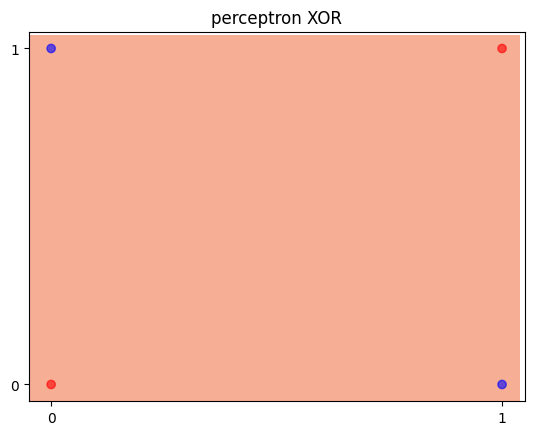

In [ ]:
# 주어진 함수를 이용하여 학습된 perceptron이 어떤 모습인지 시각화하여 봅시다.
plot_decision_boundary(perceptron_xor, xor_data, xor_labels, "perceptron XOR")

In [ ]:
# 과제: XOR 데이터에 대하여 perceptron의 decision boundary가 올바른가요?
# 답: No

# **Multi-Layer Perceptron**

MLP는 입력층, 은닉층 및 출력층의 적어도 3개의 다른 층으로 구성된 뉴럴 네트워크입니다.
입력층을 제외한 나머지 층은 non-linear activation function(ex: Sigmoid 또는 tanh)를 가진 Perceptron에 의해 구성됩니다.
MLP는 보통 역전파 알고리즘을 사용하여 훈련되며 선형적으로 분리할 수 없는 문제에 대처할 수 있습니다.

<img src=https://raw.githubusercontent.com/TomasBeuzen/deep-learning-with-pytorch/56fb575affa33b58c0621eb017a4839db924b566/chapters/img/nn-5.png>

이제 scikit-learn에서 제공해주는 MLPClassifier 모델을 사용하여 XOR문제를 해결해보도록 하겠습니다.

scikit-learn의 MLPClassifier 모델을 생성하고 (모델의 이름은 mlp_xor)합니다. 모델 파라미터는 다음과 같습니다. [다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#주어진 파라미터를 갖는 MLP 모델을 생성하고, 이를 xor 데이터에 대해 학습시킵니다.
mlp_xor = MLPClassifier(hidden_layer_sizes=(4,), max_iter=10000, random_state=0)
mlp_xor.fit(xor_data, xor_labels)

MLPClassifier(hidden_layer_sizes=(4,), max_iter=10000, random_state=0)

In [ ]:
# 과제: 주어진 다큐멘테이션을 참고하여 생성한 모델의 파라미터는 어떤것을 의미하는지 작성합니다. 한 두줄 이내로 간략하게 작성해주세요.
# hidden_layer_sizes: number of neurons in the ith layer
# max_iter: maximum number of epochs

In [ ]:
# 학습된 모델의 score를 출력합니다.
mlp_xor.score(xor_data, xor_labels)

1.0

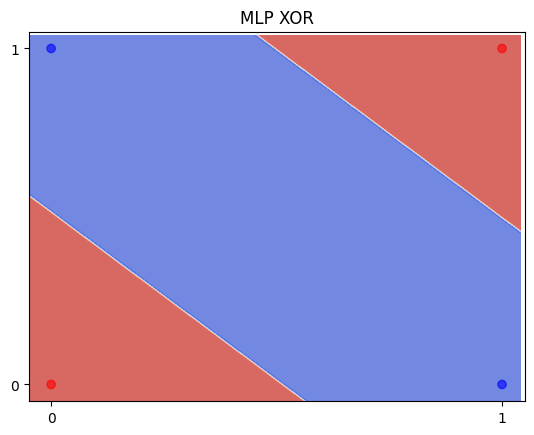

In [ ]:
# 주어진 함수를 이용하여 학습된 모델이 어떤 모습인지 시각화하여 봅시다.
plot_decision_boundary(mlp_xor, xor_data, xor_labels, "MLP XOR")

In [ ]:
# 과제: XOR 데이터에 대하여 mlp의 decision boundary가 올바른가요?
# 답: Yes

한 개의 perceptron을 사용할 때보다 여러 층으로 이루어진 MLP는 XOR 데이터에 대해 좋은 성능을 보이는 것을 확인할 수 있습니다.

그렇다면, MLP의 hidden layer 개수를 증가시키면 어떻게 되는지 확인해봅시다.

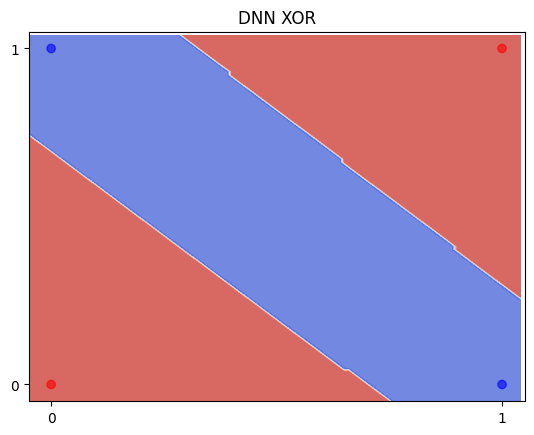

In [ ]:
# 주어진 파라미터를 갖는 MLP 모델을 생성하고, 이를 xor 데이터에 대해 학습시킵니다.
dnn_xor = MLPClassifier(hidden_layer_sizes=(4, 4, 2), max_iter=10000, random_state=0)
dnn_xor.fit(xor_data, xor_labels)
# 주어진 함수를 이용하여 학습된 모델이 어떤 모습인지 시각화하여 봅시다.
plot_decision_boundary(dnn_xor, xor_data, xor_labels, "DNN XOR")

In [ ]:
# 학습된 모델의 score를 출력합니다.
dnn_xor.score(xor_data, xor_labels)

1.0

# IRIS dataset

이번에는 UCI에서 제공해주는 iris dataset을 이용하여 실습을 진행하도록 하겠습니다.

  * UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/index.php
  * iris dataset documentation : https://archive.ics.uci.edu/ml/datasets/Iris

**Data Set Information:**

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.


**Attribute Information:**

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

Iris dataset의 label은 class 입니다. 즉, 이번 실습의 목표는 iris가 가진 sepal, petal의 정보를 바탕으로 iris의 class를 예측하는 것입니다.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# iris dataset을 받아옵니다. 이 때, pandas library를 이용하여 데이터를 dataframe의 형식으로 받아옵니다.
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(data_url, names=["sepal length", "sepal width", "petal length", "petal width", "class"])

In [ ]:
# 데이터를 확인합니다. df.head()는 dataframe df의 첫 5개 instances를 보여줍니다.
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#class의 분포를 확인해볼 수 있습니다.
df["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
# 데이터의 통계를 출력해볼 수 있습니다.
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#dataframe의 데이터 타입을 출력해봅시다. df.dtypes는 dataframe의 각 columns이 어떤 type의 data인지를 출력해줍니다.
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

class는 object type이므로 type을 변경시켜주어야 훈련 및 검증 과정에서 사용할 수 있습니다. 아래의 코드를 실행시켜 type을 변환시켜줍니다.

type 변환은 scikit-learn에서 지원하는 LabelEncoder을 사용하였습니다.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder


In [ ]:
#LabelEncoder를 사용하여 class의 type을 변환시킵니다.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["class"] = le.fit_transform(df["class"])
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class             int64
dtype: object

In [ ]:
#class가 변환된 것을 확인해봅시다.
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


받아온 dataset을 시각화하여 봅시다. class를 제외하고 총 4개의 attribute로 이루어져 있기 때문에, 이를 하나의 공간에 나타내기는 어렵습니다

따라서, 각각의 attribute를 기준으로 다른 하나의 attribute에 따른 class를 기준으로 표현해볼 수 있습니다.

데이터 시각화를 위한 seaborn library를 사용합니다.
*  seaborn: https://seaborn.pydata.org/
*  seaborn.pairplot: https://seaborn.pydata.org/generated/seaborn.pairplot.html

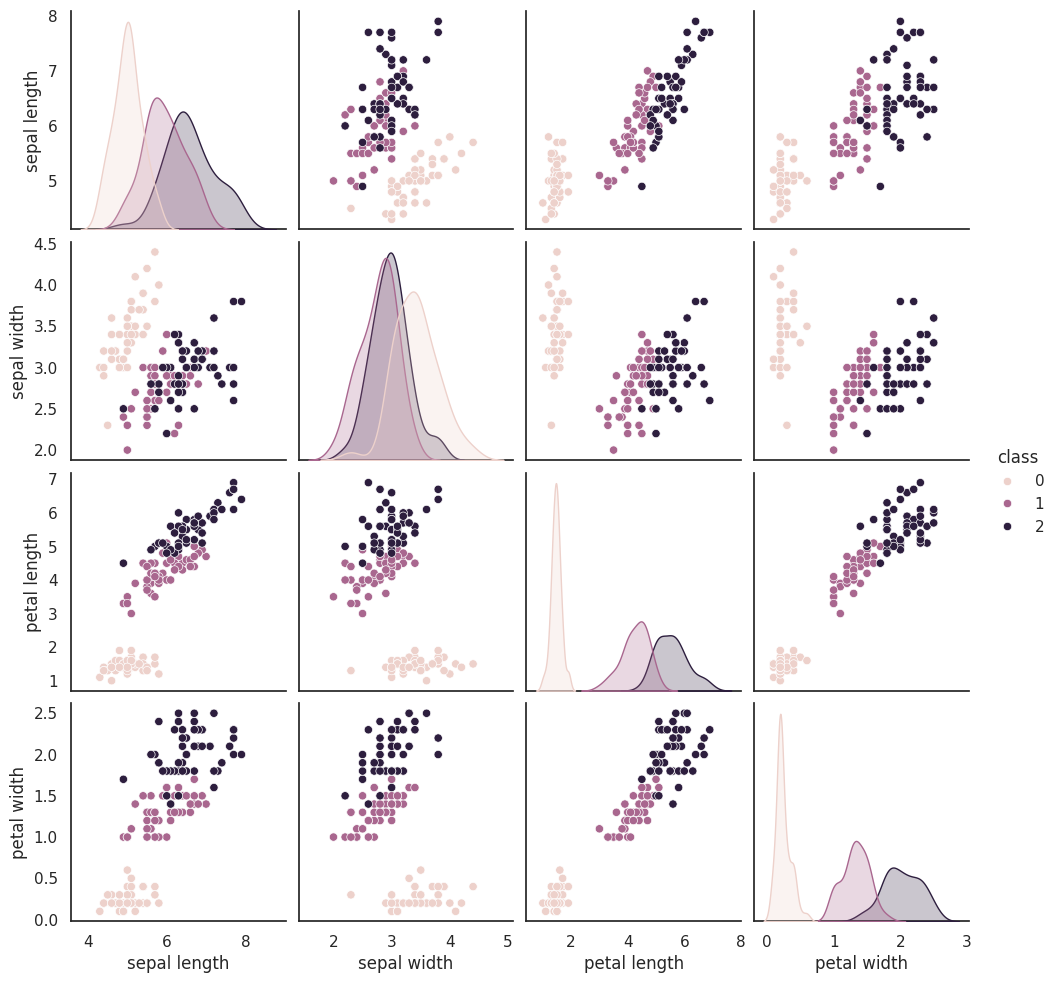

In [ ]:
# dataset을 시각화하여 봅시다.

import seaborn as sns

sns.set_theme(style="white")
sns.pairplot(df, hue="class")

이제 classification model을 생성하고, 데이터셋을 학습시켜봅시다.

머신러닝 모델을 학습시킬 때는 데이터셋 전체를 사용하지 않습니다.

본 실습에서는 train 데이터와 test 데이터로 분리하여 사용합니다.

<img src=https://scikit-learn.org/stable/_images/grid_search_workflow.png width=500>



In [ ]:
#dataset을 label 데이터와 feature 데이터로 분리합니다.
#label 데이터는 우리가 예측해야하는 값, feature 데이터들은 예측에 활용하게 되는 변수들입니다.
y = df["class"]
X = df.drop(columns=["class"])

In [ ]:
from sklearn.model_selection import train_test_split

#dataset을 split합니다. (train : test = 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train 데이터와 test 데이터의 개수를 출력합니다.
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
# 과제: split 하기 이전, 총 dataset의 instance 개수는 몇 개 인가요?
# 답: 3*50 = 150

In [ ]:
# perceptron model을 생성한 뒤, 학습시킵니다.
perceptron_iris = Perceptron()
perceptron_iris.fit(X_train, y_train)

Perceptron()

In [ ]:
perceptron_iris.score(X_test, y_test)

0.8333333333333334

In [ ]:
# mlp model을 생성한 뒤, 학습시킵니다.
mlp_iris = MLPClassifier()
mlp_iris.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
mlp_iris.score(X_test, y_test)

1.0

In [ ]:
# mlp model의 parameter를 변경하여, 성능이 향상되는 것을 확인해 볼 수 있습니다.
mlp_iris = MLPClassifier(hidden_layer_sizes=(3, ), random_state=42, max_iter=10000)
mlp_iris.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(3,), max_iter=10000, random_state=42)

In [ ]:
mlp_iris.score(X_test, y_test)

0.9666666666666667

In [ ]:
# 과제: MLP model의 hidden_layer_sizes 를 임의로 변경하고, 이전의 모델과 비교해보세요.
mlp_iris = MLPClassifier(hidden_layer_sizes=(5, ), random_state=42, max_iter=10000)
mlp_iris.fit(X_train, y_train)
mlp_iris.score(X_test, y_test)

0.9666666666666667

In [ ]:
# 과제: 정확도 비교
# 답: they are similar

<img src=https://miro.medium.com/v2/0*-oGC3SE8sPCPdmxs.jpg width=600>

생성한 모델을 평가하는 방법은 다양합니다.

여기서는 confusion matrix와 classification report를 이용하여 모델의 결과를 출력해보고자 합니다.

confusion matrix는 target (label)의 실제값과, 모델의 예측값에 어느정도의 차이가 있는지를 나타내줍니다. 이는 정확도와 유사하지만, 실제로 모델이 어느 feature에 대한 예측 성능이 높은지를 보여줄 수도 있습니다.

머신러닝에서는 정확도 이외에도 precision, recall 등의 다양한 metric을 통해 model evaluation을 수행할 수 있습니다. 이를 간략하게 보여주는 classification report를 출력해 볼 수도 있습니다.

<참고> Evaluation metrics: https://pytorch.org/torcheval/main/torcheval.metrics.html

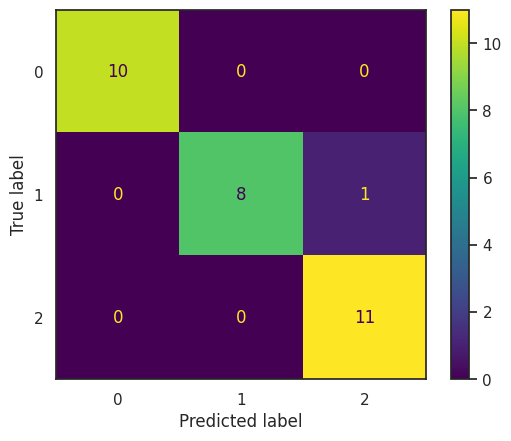

In [ ]:
# confusion matrix를 출력해봅니다.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = mlp_iris.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=mlp_iris.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_iris.classes_)
disp.plot()
plt.show()

In [ ]:
#자세한 통계를 확인해봅니다.
from sklearn.metrics import classification_report

y_pred = mlp_iris.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# **Cross Validation (CV)**

교차 검증(Cross Validation)은 데이터셋을 여러 개의 부분집합으로 나누어 모델의 성능을 평가하는 방법입니다.

**교차검증이 왜 필요한가?**

과적합(overfitting)을 피하면서 신뢰성있는 모델평가를 진행하기 위함입니다.

일반화 성능을 확인하기 위해 훈련 세트와 테스트 세트로 한번 나누는 것보다 더 안정적이고 뛰어난 통계적 평가 방법입니다.

*  Data split:

<img src=https://ugc.futurelearn.com/uploads/assets/e3/59/e359e512-0004-4494-8840-497841d1ae46.png width=500>

* Data split in CV:

<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width=500>

**k-fold cross validation**

  1. 전체 데이터셋을 training /test set으로 분리
  2. training 데이터를 임의의 K개의 fold로 나눔
  3. 각 split마다 돌아가면서 한개의 fold데이터셋을 validation data로 지정
  4. 이외의 data는 train 데이터로 모델을 훈련시키는데 사용
  5. 각 split마다 validation 데이터를 사용하여 모델을 검증
  6. 각 split의 검증된 결과들의 평균을 측정

In [ ]:
n_iter =0
# 데이터셋을 train과 validation으로 나누어주는 KFold를 알아봅니다.
from sklearn.model_selection import KFold

 #train/validation set을 n_splits번 만큼 진행해줌.
kf = KFold(n_splits=5)

#kf.split(x_train)은 x_train데이터 셋을 K번
#train/validation set로 분리시킴
for train_index, val_index in kf.split(X_train):
  n_iter+=1
  #feature data 나눈것
  X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
  #label(class) data 나눈것
  y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
  print('\n===교차 검증 : {0}==='.format(n_iter))
  #data가 어떻게 각 fold마다 나뉘는지 출력
  print(y_train_cv.value_counts())


===교차 검증 : 1===
class
2    33
1    33
0    30
Name: count, dtype: int64

===교차 검증 : 2===
class
1    33
2    32
0    31
Name: count, dtype: int64

===교차 검증 : 3===
class
1    34
2    32
0    30
Name: count, dtype: int64

===교차 검증 : 4===
class
0    34
2    32
1    30
Name: count, dtype: int64

===교차 검증 : 5===
class
0    35
1    34
2    27
Name: count, dtype: int64


In [ ]:
# 5-fold cross validation
# sklearn 의 cross validation 모듈을 사용하여 5-fold cross validation을 수행해봅니다.
from sklearn.model_selection import cross_validate
mlp = MLPClassifier(hidden_layer_sizes=(3,), max_iter=10000, random_state=42)
cv_results = cross_validate(mlp, X_train, y_train, cv=5)

In [ ]:
#각 fold마다의 validation score을 출력해봅시다.
cv_results['test_score']

array([0.95833333, 1.        , 0.83333333, 1.        , 1.        ])

In [ ]:
# 각 fold마다의 validation accuracy의 평균을 내봅시다.
print(np.mean(cv_results['test_score']))

0.9583333333333334


In [ ]:
# 과제: 위의 함수를 사용하여 10-fold cross validation을 수행해보고, 평균 accuracy를 구해봅시다.
cv_results = cross_validate(mlp, X_train, y_train, cv=10)
print(np.mean(cv_results['test_score']))

0.9666666666666666


# 실습 과제

실습과제는 Breast cancer dataset을 사용하여 `MLPClassifier`를 학습시킨 뒤, 각 모델의 성능을 비교해보는 것입니다. 데이터셋은 아래 주어진 것을 사용하면 됩니다.

  1. Breast cancer dataset document: https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

  다큐멘테이션을 읽고, Breast cancer dataset의 target(label) attribute는 무엇인지 작성합니다.

  2. 아래 주어진 Breast cancer dataset을 train, test dataset으로 나눕니다.

  3. scikit-learn의 `MLPClassifier`을 사용하여 어떠한 모델 파라미터도 조정하지 않은 baseline `MLPClassifier` 모델을 생성하고 훈련시켜 테스트 데이터에 대한 정확도를 출력합니다.
  
  4. `hidden_layer_sizes`가 2개 이상의 hidden layer을 가진 새로운 MLP 모델을 생성하고, 이들의 정확도를 출력합니다. 그리고 서로 비교합니다.
    *  `hidden_layer_sizes=(100,)`: 1 hidden layer, 100 hidden neurons
    *  `hidden_layer_sizes=(25,11,7,5,3,)`: 5 hidden layers, 각 숫자는 각 hidden layer의 hidden neuron 개수

  5. MLP 모델의 파라미터를 조정하여 정확도를 높인 모델을 생성하고자 합니다. 조정할 파라미터는 `hidden_layer_sizes`, `activation`, `learning_rate_init`, `max_iter` 입니다.

  `MLPClassifer` document: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

  다큐멘테이션을 읽고, 조정할 서로 다른 파라미터군 두 개를 선정하여 작성합니다. 각 파라미터군은 두 개 이상의 파라미터가 포함되어야 하며, 4개 모두 포함되어도 됩니다. 그 후, 각 파라미터들의 역할과 조정하였을 때 예상되는 모델의 성능 향상 여부와 그 이유에 대해 간략하게 서술합니다. Read the documentation and select and create two different parameter groups to adjust. Each parameter group must contain more than one parameter and may contain all four. After that, we briefly describe the role of each parameter and the expected performance improvement of the model when adjusted and why.

  6. 4에서 정한 파라미터들을 조정하여 새로운 MLP 모델 두 개를 생성하고, 각 모델의 정확도를 출력합니다. 해당 모델들에 대해서, baseline 모델과의 정확도를 비교하여 서술합니다. 이 때 각 모델의 정확도는 5-fold cross validation의 평균을 이용하여 성능을 평가하여야 합니다. Adjust the parameters specified in 4 to generate two new MLP models and output the accuracy of each model. For those models, the accuracy with the baseline model is compared and described. In this case, the accuracy of each model should be evaluated using the average of 5-fold cross validation.

In [ ]:
from sklearn.datasets import load_breast_cancer

breasts = load_breast_cancer()
df = pd.DataFrame(breasts.data, columns=breasts.feature_names)
df['class'] = breasts.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Target attributes: radius, texture, perimeter, area, smoothness, compactness, concavity,  concave points, symmetry, fractal dimension

In [ ]:
# Change the class type using LabelEncoder

le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])

In [ ]:
# Target attributes

y = df["class"]
X = df[0:9]
X = df.drop(columns=["class"])

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create MLP model and train
mlp_breasts = MLPClassifier()
mlp_breasts.fit(X_train, y_train)

MLPClassifier()

In [ ]:
mlp_breasts.score(X_test, y_test)

0.9298245614035088

In [ ]:
# MLP model with different hidden layer sizes
mlp_breasts = MLPClassifier(hidden_layer_sizes=(100, ), random_state=42, max_iter=10000)
mlp_breasts.fit(X_train, y_train)
mlp_breasts.score(X_test, y_test)

0.9385964912280702

In [ ]:
mlp_breasts = MLPClassifier(hidden_layer_sizes=(25,11,7,5,3,), random_state=42, max_iter=10000)
mlp_breasts.fit(X_train, y_train)
mlp_breasts.score(X_test, y_test)

0.9736842105263158

The MLP model with more hidden layers has better accuracy score

In [ ]:
# Changing 2 parameter groups
mlp_breasts = MLPClassifier(hidden_layer_sizes=(25,11,7,5,3,), random_state=100, max_iter=10000)
mlp_breasts.fit(X_train, y_train)
mlp_breasts.score(X_test, y_test)

0.6228070175438597

In [ ]:
mlp_breasts = MLPClassifier(hidden_layer_sizes=(25,11,7,5,3,), random_state=42, max_iter=2000)
mlp_breasts.fit(X_train, y_train)
mlp_breasts.score(X_test, y_test)

0.9736842105263158

Changing of the number of random states decreases the accuracy score significantly. This may be due to the increased randomness and variance introduced.

Changing of the maximum number of epochs has little effect on the accuracy score.

In [ ]:
# Using 5-fold cross validation

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
cv_results = cross_validate(mlp, X_train, y_train, cv=5)
print(np.mean(cv_results['test_score']))

0.9340659340659341


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(25,11,7,5,3,), max_iter=1000, random_state=42)
cv_results = cross_validate(mlp, X_train, y_train, cv=5)
print(np.mean(cv_results['test_score']))

0.876923076923077


The accuracy score decreased for both models compared to the baseline.